<a href="https://colab.research.google.com/github/rlarjsdn4505/first-repository/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%86%A4_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataton/df1.csv")

In [ ]:
# 모든 컬럼 보이게
pd.set_option('display.max_columns', None)

# 가로 폭 제한 없애기
pd.set_option('display.width', None)

# 문자열(컬럼명/텍스트 값) 잘리지 않게
pd.set_option('display.max_colwidth', None)


In [ ]:
df.head()

,주문ID,리뷰ID,리뷰점수,리뷰작성일,주문상태,구매일시,실제배송일,예상배송일,고객고유ID,고객우편번호앞자리,고객도시,고객주,주문개수,상품가격합계,배송비합계,상품카테고리,결제금액(주문합),총결제금액,배송지연일수,배송지연여부
0,00010242fe8c5a6d1ba2dd792cb16214,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1,58.90,13.29,문화/취미/엔터테인먼트,72.19,72.19,8,0
1,00018f77f2f0320c557190d7a144bdd3,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1,239.90,19.93,반려동물,259.83,259.83,2,0
2,000229ec398224ef6ca0657da4fc703e,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1,199.00,17.87,가구/홈리빙/인테리어,216.87,216.87,13,0
3,00024acbcdf0a6daa1e931b038114c75,f4028d019cb58564807486a6aaf33817,4,2018-08-15 00:00:00,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1,12.99,12.79,뷰티/헬스,25.78,25.78,5,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,940144190dcba6351888cafa43f3a3a5,5,2017-03-02 00:00:00,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1,199.90,18.14,가구/홈리빙/인테리어,218.04,218.04,15,0


- 폰트 업로드

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving NanumGothic.ttf to NanumGothic.ttf


In [ ]:
import os
font_path = '/content/NanumGothic.ttf'
print('exists:', os.path.exists(font_path), 'cwd:', os.getcwd())

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

fm._load_fontmanager(try_read_cache=False)

fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)
family_name = prop.get_name()
print('detected family:', family_name)
mpl.rcParams['font.family'] = family_name
mpl.rcParams['axes.unicode_minus'] = False

exists: True cwd: /content
detected family: NanumGothic


# H2-1: 상품 가격이 높을수록 고객은 리뷰 점수에 더 민감할 것이다.

In [ ]:
df['상품가격합계'].describe()

,상품가격합계
count,82548.000000
mean,114.773925
std,117.141508
min,0.850000
25%,44.900000
50%,79.990000
75%,139.990000
max,969.000000


/tmp/ipython-input-1799001716.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price = df.groupby("가격구간")["상품가격합계"].median()
/tmp/ipython-input-1799001716.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_scores = df.groupby("가격구간")["리뷰점수"].mean()


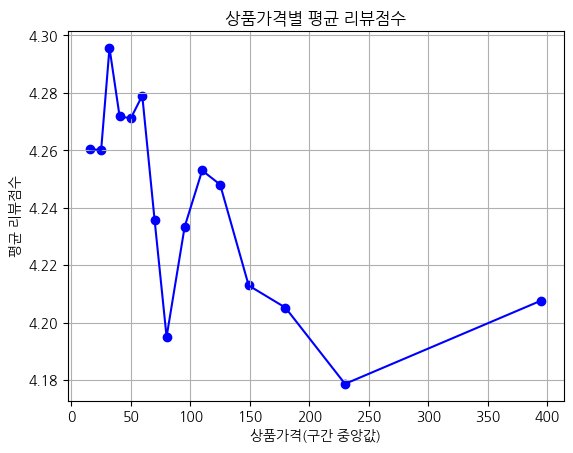

In [ ]:
# '상품가격합계'값을 10분위로 나누어 '가격구간'에 저장
df["가격구간"] = pd.qcut(df["상품가격합계"], 15)

# '상품가격합계'의 '가격구간'별 중앙값
price = df.groupby("가격구간")["상품가격합계"].median()

# '리뷰점수'의 '가격구간'별 평균
price_scores = df.groupby("가격구간")["리뷰점수"].mean()

# 산점도 + 선 그래프
plt.scatter(price, price_scores, color="blue")   # 점
plt.plot(price, price_scores, color="blue")      # 선 연결
plt.title("상품가격별 평균 리뷰점수")
plt.xlabel("상품가격(구간 중앙값)")
plt.ylabel("평균 리뷰점수")
plt.grid(True)
plt.show()

# H2-2: 배송비가 높을수록 리뷰 점수는 낮을 가능성이 있다.

In [ ]:
df['배송비합계'].describe()

,배송비합계
count,82548.000000
mean,19.573702
std,10.659119
min,0.000000
25%,13.470000
50%,16.680000
75%,22.330000
max,70.000000


/tmp/ipython-input-1509646824.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ship = df.groupby("배송비구간")["배송비합계"].median()
/tmp/ipython-input-1509646824.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ship_scores = df.groupby("배송비구간")["리뷰점수"].mean()


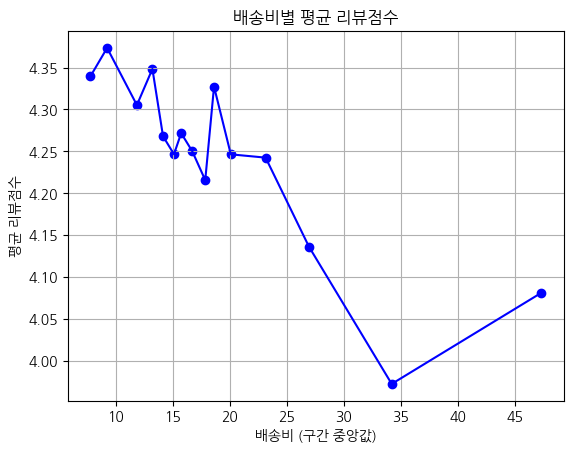

In [ ]:
# '배송비합계'값을 10분위로 나누어 '배송비구간'에 저장
df["배송비구간"] = pd.qcut(df["배송비합계"], 15)

# '배송비합계'의 '배송비구간'별 중앙값
ship = df.groupby("배송비구간")["배송비합계"].median()

# '리뷰점수'의 '배송비구간'별 평균
ship_scores = df.groupby("배송비구간")["리뷰점수"].mean()

# 산점도 + 선 그래프
plt.scatter(ship, ship_scores, color="blue")   # 점
plt.plot(ship, ship_scores, color="blue")      # 선 연결
plt.title("배송비별 평균 리뷰점수")
plt.xlabel("배송비 (구간 중앙값)")
plt.ylabel("평균 리뷰점수")
plt.grid(True)
plt.show()

- 상관계수

변수끼리의 관계 강도 방향과 강도 확인

값이 1에 가까우면 관계가 가깝다, 같이 오른다

값이 -1에 가까우면 반비례하다, 오르면 내린다

0에 가까우면 관계가 거의 없다.

In [ ]:
from scipy import stats

for x in ["상품가격합계","배송비합계"]:
    r, p = stats.spearmanr(df[x], df["리뷰점수"], nan_policy="omit")
    print(f"{x} vs 리뷰점수: ρ={r:.3f}, p={p:.3g}")

상품가격합계 vs 리뷰점수: ρ=-0.011, p=0.00142
배송비합계 vs 리뷰점수: ρ=-0.063, p=4e-73


상관계수는 -0.011, -0.063 으로 값이 거의 0에 가깝다.

뒤에 p는 상관계수가 우연히 나온 것일 확률


- 회귀분석

변수끼리의 관계의 영향 크기와 통계적 유의성 확인

In [ ]:
import statsmodels.api as sm

use = df[["상품가격합계","배송비합계","리뷰점수"]].dropna()
X = sm.add_constant(use[["상품가격합계","배송비합계"]])
y = use["리뷰점수"]

model = sm.OLS(y, X).fit(cov_type="HC3")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     170.7
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           1.00e-74
Time:                        07:01:10   Log-Likelihood:            -1.3202e+05
No. Observations:               82548   AIC:                         2.640e+05
Df Residuals:                   82545   BIC:                         2.641e+05
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3879      0.009    493.291      0.0

- R-squared : 0.005
  모델 설명력 : 모델이 리뷰점수를 0.5%밖에 설명 못 함 즉, 리뷰점수는 다른 요인이 훨씬 중요

- coef :  
  - 상품가격합계: +0.000091 → (가격 ↑) → (리뷰점수 아주 미세하게 ↑)
  - 배송비합계: -0.0081 → (배송비 ↑) → (리뷰점수 ↓)
  
  영향 방향과 크기 확인

- P>|z| (p-value) :
  - 상품가격합계 p=0.022 → 통계적으로 유의하지만 영향은 작음

  - 배송비합계 p=0.000 → 매우 유의, 확실한 영향

  통계적으로 유의한지 확인

  0.05보다 작으면 "진짜 효과 있음"